In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import math
from scipy.stats import mannwhitneyu
import statsmodels.api as sm

In [ ]:
data = pd.read_csv('forbes_new.csv')
data.head()

,Rank,Name,Country,Sales,Profit,Assets,MV,Industry,Founded,Employees,Company age,World
0,1,Berkshire Hathaway,United States,276090.0,89800.0,958780.0,741480.0,Diversified Financials,1939,372000.0,84,North America
1,3,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,400380.0,105360.0,576040.0,2292080.0,Oil & Gas Operations,1933,68493.0,90,Asia
2,4,JPMorgan Chase,United States,124540.0,42120.0,3954690.0,374450.0,Banking,2000,270000.0,23,North America
3,6,Amazon,United States,469820.0,33360.0,420550.0,1468400.0,E-Commerce,1994,1608000.0,29,North America
4,7,Apple,United States,378700.0,100560.0,381190.0,2640320.0,Electronics,1976,164000.0,47,North America


#1

In [ ]:
print('MV в Азии =', data[data.World =='Asia']['MV'].mean())
print('MV в Южной Америке =', data[data.World == 'South America']['MV'].mean())
print('MV в Северной Америке =', data[data.World == 'North America']['MV'].mean())
print('MV в Африке =', data[data.World == 'Africa']['MV'].mean())
print('MV в Европе =', data[data.World == 'Europe']['MV'].mean())
print('MV в Авсралии =', data[data.World == 'Australia']['MV'].mean())
print('MV в мире =', data['MV'].mean())

MV в Азии = 25603.0113452188
MV в Южной Америке = 23536.0
MV в Северной Америке = 64150.91258741259
MV в Африке = 14888.666666666666
MV в Европе = 33569.794117647056
MV в Авсралии = 40053.46153846154
MV в мире = 41117.5015576324


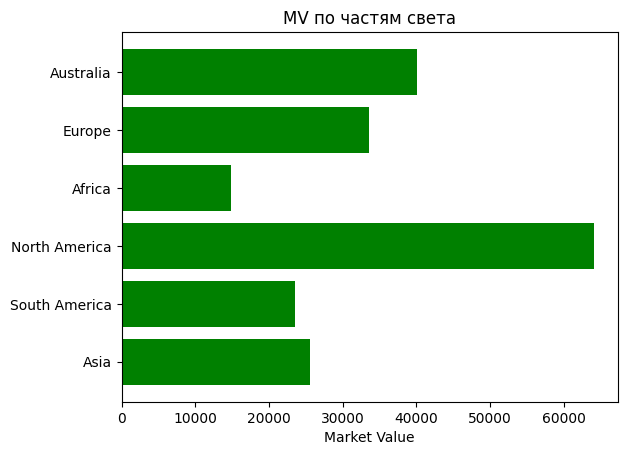

In [ ]:
plt.barh(['Asia', 'South America', 'North America', 'Africa', 'Europe', 'Australia'],[data[data.World =='Asia']['MV'].mean(), data[data.World == 'South America']['MV'].mean(), data[data.World == 'North America']['MV'].mean(),
          data[data.World == 'Africa']['MV'].mean(), data[data.World == 'Europe']['MV'].mean(), data[data.World == 'Australia']['MV'].mean(),
          ], color='green')
plt.title('MV по частям света')
plt.xlabel('Market Value');

Мы видим сильное различие между средним Market Value Северной Америки и в мире. Проверим, различаются ли в действительности распределения Market Value.


## Гипотеза: в компаниях Северной Америки и Остального мира Market Value распределен одинаково против альтернативы о неравенстве распределений

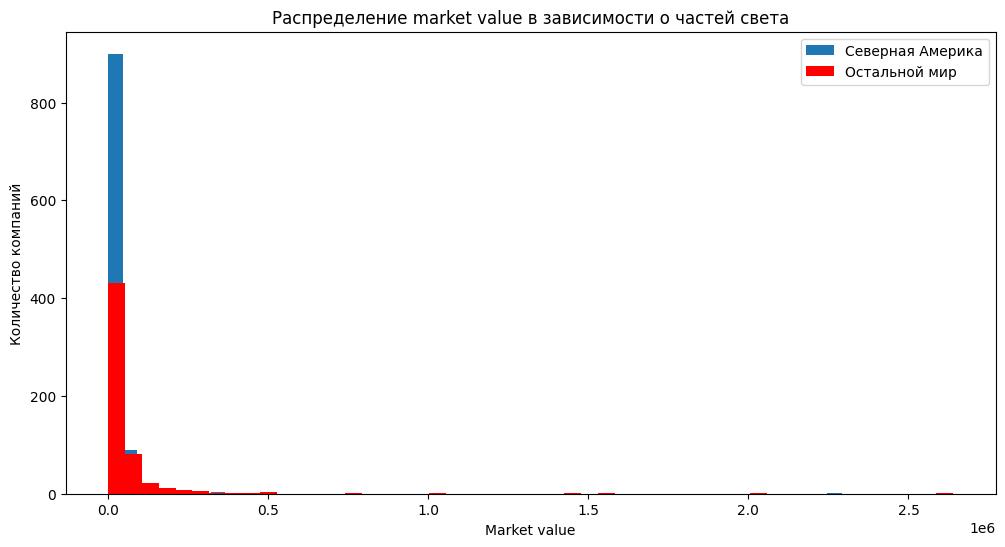

In [ ]:
plt.figure(figsize = (12,6))
plt.hist(data[data.World != 'North America']['MV'], bins = 50)
plt.hist(data[data.World == 'North America']['MV'], bins = 50, color='red')
plt.legend(['Северная Америка', 'Остальной мир'])
plt.title('Распределение market value в зависимости о частей света')
plt.xlabel('Market value')
plt.ylabel('Количество компаний');

In [ ]:
stat, p_value = mannwhitneyu(data[data.World != 'North America']['MV'], data[data.World == 'North America']['MV'], alternative="two-sided")
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не удалось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


Таким образом, MV в Сеерной Америке и остальном мире действительно распределены неодинаково.

#2

##Гипотеза: у более старых компаний MV в среднем меньше.

In [ ]:
data['Company age'].mean() #будем считать, что старые компании - те, что старше 67 лет

67.05669781931464

In [ ]:
old = data[data['Company age']>67]
young = data[data['Company age']<=67]

In [ ]:
old.MV.mean(), young.MV.mean()

(40382.10634920635, 41592.68)

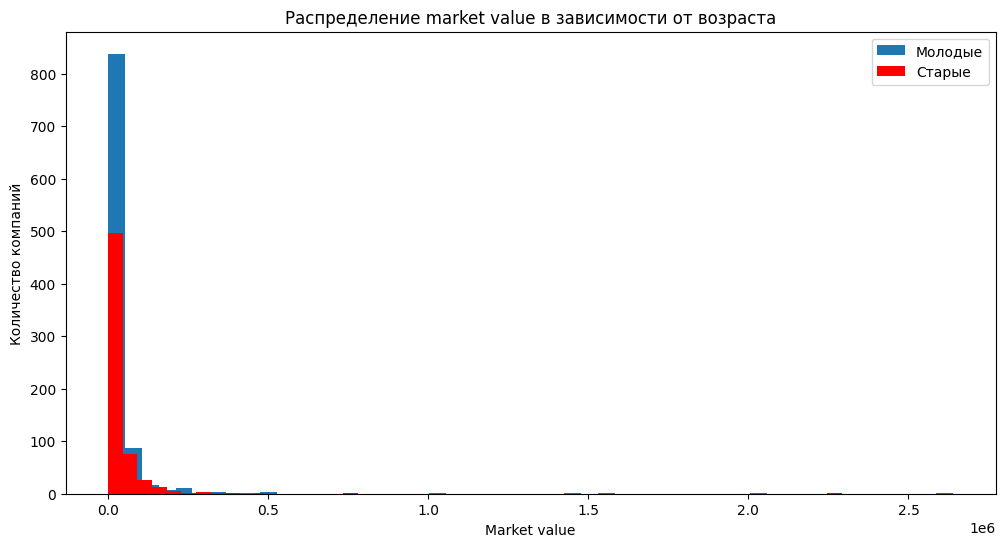

In [ ]:
plt.figure(figsize = (12,6))
plt.hist(young.MV, bins = 50)
plt.hist(old.MV, bins = 50, color='red')
plt.legend(['Молодые', 'Старые'])
plt.title('Распределение market value в зависимости от возраста')
plt.xlabel('Market value')
plt.ylabel('Количество компаний');

Распределение не нормальное, проверяем z-тестом, тем более количество наблюдений позволяет

In [ ]:
group1 = young['MV']
group2 = old['MV']
mean1, mean2 = group1.mean(), group2.mean()
std1, std2 = group1.std(), group2.std()
diff = mean1 - mean2
se = np.sqrt((std1**2)/len(group1) + (std2**2)/len(group2))
Z_obs = diff / se
alpha = 0.05
Z_crit = norm.ppf(1-alpha)
if Z_crit < Z_obs:
    print('Гипотеза отвергается')
else:
    print('Гипотеза не отвергается')

Гипотеза не отвергается


Нам не удалось отвергнуть гипотезу о том, что молодые компании в среднем имеют такой же market value, как и старые.

#3

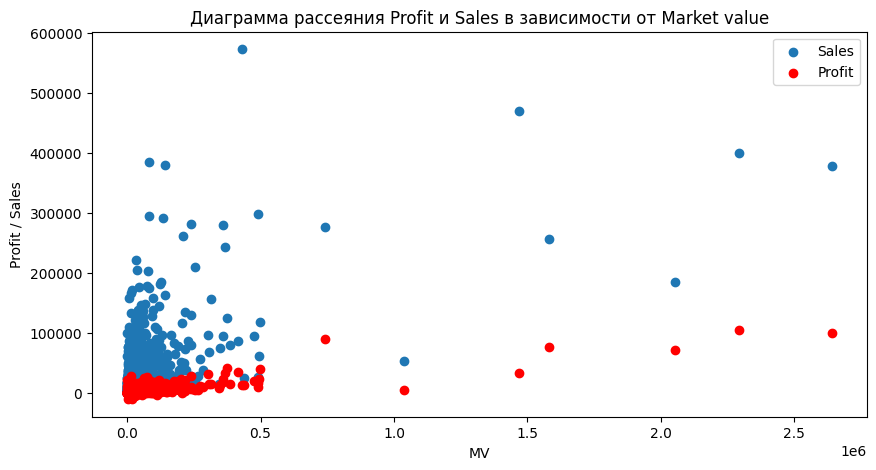

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(data['MV'], data['Sales'])
plt.scatter(data['MV'], data['Profit'], c='red')
plt.xlabel('MV')
plt.ylabel('Profit / Sales')
plt.legend(['Sales', 'Profit'])
plt.title('Диаграмма рассеяния Profit и Sales в зависимости от Market value');

##Гипотеза: Profit влияет на Market value больше, чем Sales

In [ ]:
y = data["MV"]
X = data[["Sales", "Profit"]]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     1782.
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:55:15   Log-Likelihood:                -20222.
No. Observations:                1605   AIC:                         4.045e+04
Df Residuals:                    1602   BIC:                         4.047e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3427.2968   2077.202     -1.650      0.0

p-value у Sales (=0.022) больше => Sales меньше влияет на Market value. Более того, если бы модель строилась только на этих двух признаках, то гипотеза о том, что Sales вообще как-то влияет на Market value, отергалась бы на уровне значимости $\alpha$=1%

# 4

Возьмем топ-2 индустрии по количеству компаний и посмотрим на их Market values

In [ ]:
data[data.Industry == 'Electronics'].MV.mean(), data[data.Industry == 'Oil & Gas Operations'].MV.mean()

(590985.5555555555, 62642.808219178085)

Проверим гипотезу о том, что в среднем MV у топ-2 индустрий одинаковый против альтернативы о неравенстве

In [ ]:
group1 = data[data.Industry == 'Electronics'].MV
group2 = data[data.Industry == 'Oil & Gas Operations'].MV
mean1, mean2 = group1.mean(), group2.mean()
std1, std2 = group1.std(), group2.std()
diff = mean1 - mean2
se = np.sqrt((std1**2)/len(group1) + (std2**2)/len(group2))
Z_obs = diff / se
alpha = 0.05
Z_crit = norm.ppf(1-alpha/2)
if Z_crit < Z_obs or -Z_crit>Z_obs :
    print('Гипотеза отвергается')
else:
    print('Гипотеза не отвергается')

Гипотеза не отвергается


In [ ]:
Z_obs, Z_crit

(1.5588164392081956, 1.959963984540054)

Гипотеза о равенстве Market values у топ-2 индустрий не отвергается

# 5

Проверим гипотезу о том, что MV у топ-5 индустрий в среднем такой же, как в остальных индустриях против гипотезы о том, что в топ-5 компаниях MV больше

In [ ]:
group1 = data[(data.Industry == 'Electronics')| (data.Industry == 'Oil & Gas Operations') |
     (data.Industry == 'Drugs & Biotechnology')| (data.Industry == 'Banking')| (data.Industry == 'IT, Internet, Software & Services')].MV
group2 = data[(data.Industry != 'Electronics')| (data.Industry != 'Oil & Gas Operations') |
     (data.Industry != 'Drugs & Biotechnology')| (data.Industry != 'Banking')| (data.Industry != 'IT, Internet, Software & Services')].MV

In [ ]:
group1.mean(), group2.mean()

(63968.03363914373, 41117.5015576324)

In [ ]:
mean1, mean2 = group1.mean(), group2.mean()
std1, std2 = group1.std(), group2.std()
diff = mean1 - mean2
se = np.sqrt((std1**2)/len(group1) + (std2**2)/len(group2))
Z_obs = diff / se
alpha = 0.05
Z_crit = norm.ppf(1-alpha)
if Z_crit < Z_obs :
    print('Гипотеза отвергается')
else:
    print('Гипотеза не отвергается')

Гипотеза не отвергается


Гипотеза о том, что MV равны у топ-5 индустрий и у остальных индустрий, не отвергается на уровне значимости 5%